<h1> <center> Stock Analysis

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df= pd.read_csv(r"C:\Users\3M\Desktop\Stock Analysis\Data\data project.csv")
df

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971


<H3> DATA AUDIT

In [13]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [14]:
df.tail()

,Company,Date,Close/Last,Volume,Open,High,Low
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971
25159,NFLX,07/18/2013,$38.0586,20418642,$38.6157,$38.6157,$37.7143


In [15]:
df.sample(10)

,Company,Date,Close/Last,Volume,Open,High,Low
3361,SBUX,03-06-2020,$75.34,18080150,$73.46,$75.71,$72.05
821,AAPL,04-09-2020,$66.9975,162116480,$67.175,$67.5175,$66.175
18683,TSLA,04-12-2019,$17.8467,101030739,$18.0147,$18.13,$17.7887
5472,MSFT,10/13/2021,$296.31,23424030,$294.91,$297.28,$293.49
18652,TSLA,05/29/2019,$12.6573,179529510,$12.4733,$12.826,$12.336
18646,TSLA,06-06-2019,$13.73,303632098,$13.6293,$14.0667,$13.4533
16761,AMZN,11/30/2016,$37.5285,92143040,$38.10,$38.4045,$37.5125
4306,SBUX,06-03-2016,$54.61,6648801,$54.71,$55.08,$54.40
15903,AMZN,04/30/2020,$123.70,190692220,$120.992,$123.75,$119.8005
10812,QCOM,07/24/2020,$88.89,9519999,$89.21,$90.29,$87.51


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [17]:
df.dtypes

Company       object
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [18]:
df.isna().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [19]:
# Remove the dollar signs and convert the columns to numeric types
columns_to_convert = ['Close/Last', 'Open', 'High', 'Low']

for column in columns_to_convert:
   df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     25160 non-null  object 
 1   Date        25160 non-null  object 
 2   Close/Last  25160 non-null  float64
 3   Volume      25160 non-null  int64  
 4   Open        25160 non-null  float64
 5   High        25160 non-null  float64
 6   Low         25160 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [21]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

<H3> Overview of Descriptive Statistics

In [22]:
df.describe().round()

,Date,Close/Last,Volume,Open,High,Low
count,15230,25160.0,2.516000e+04,25160.0,25160.0,25160.0
mean,2018-07-13 04:03:56.375574528,102.0,5.131764e+07,102.0,104.0,101.0
min,2013-07-18 00:00:00,2.0,1.143952e+06,2.0,2.0,2.0
25%,2016-01-14 00:00:00,37.0,1.200394e+07,37.0,37.0,36.0
50%,2018-07-18 00:00:00,66.0,2.672083e+07,66.0,66.0,65.0
75%,2021-01-13 00:00:00,134.0,6.857269e+07,134.0,136.0,133.0
max,2023-07-17 00:00:00,692.0,1.065209e+09,692.0,701.0,686.0
std,NaN,102.0,6.399143e+07,102.0,104.0,100.0


<h3> EXPLORATORY DATA ANALYSIS

- <h4> Distribution Of Closing Prices

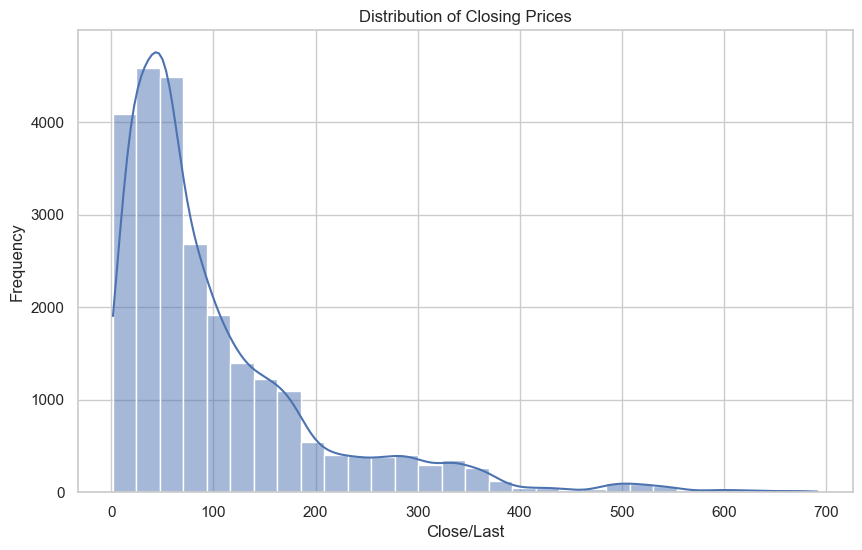

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Close/Last'], kde=True, bins=30)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close/Last')
plt.ylabel('Frequency')
plt.show()

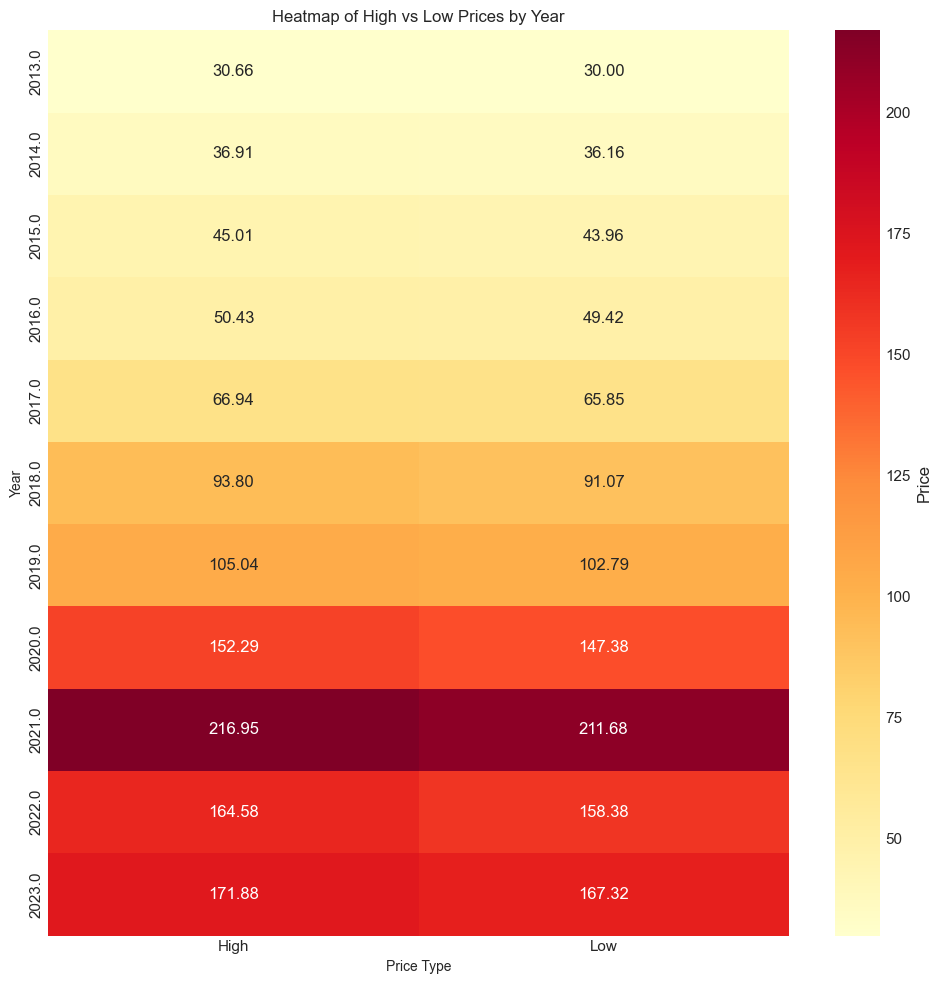

In [24]:
 df_pivot = df.pivot_table(values=['High', 'Low'], 
                         index=df['Date'].dt.year,  
                         aggfunc='mean')  

plt.style.use('seaborn-v0_8-dark')

plt.figure(figsize=(10, 10))

sns.heatmap(df_pivot, 
            annot=True,  # Show values in cells
            fmt='.2f',   # Format to 2 decimal places
            cmap='YlOrRd',  # Color scheme
            cbar_kws={'label': 'Price'})


plt.title('Heatmap of High vs Low Prices by Year', fontsize=12)
plt.xlabel('Price Type', fontsize=10)
plt.ylabel('Year', fontsize=10)


plt.tight_layout()


plt.show()


- <h4> Relationship Between Opening and Closing Prices

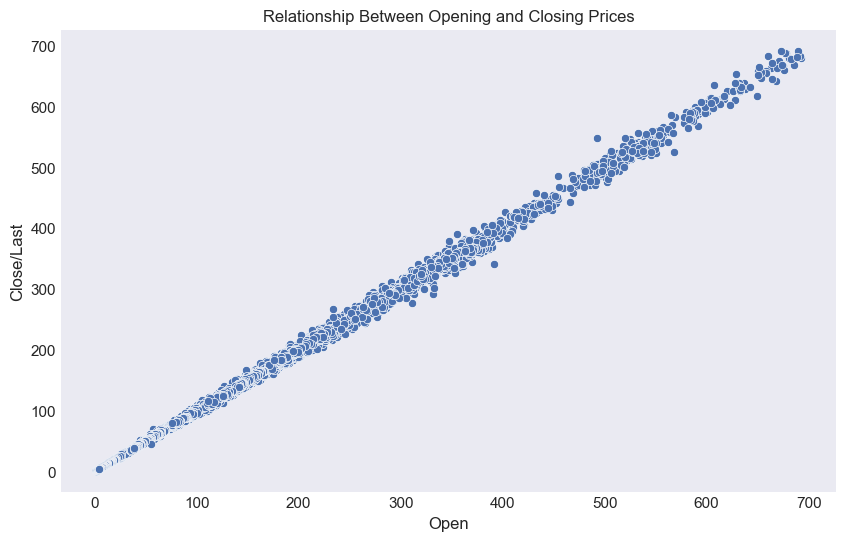

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close/Last', data=df)
plt.title('Relationship Between Opening and Closing Prices')
plt.xlabel('Open')
plt.ylabel('Close/Last')
plt.show()

- <h4>  Trading Volume Over Time

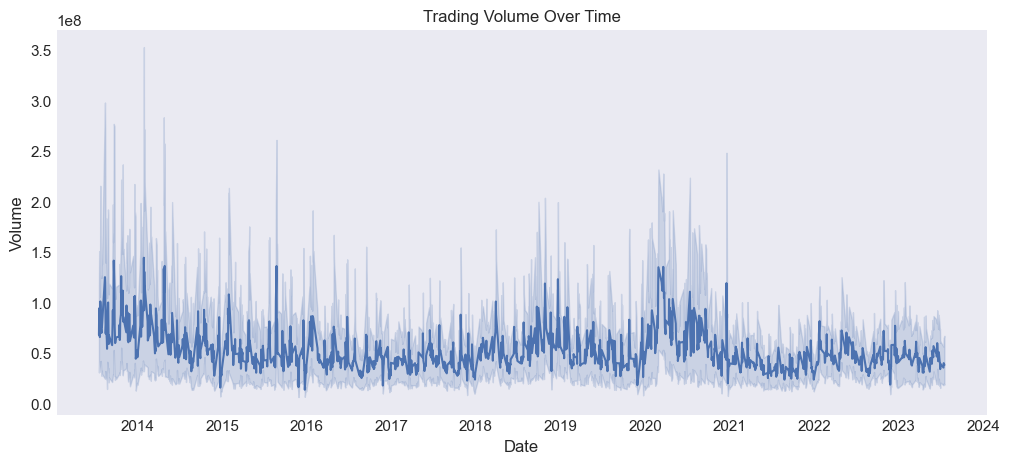

In [26]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='Volume', data=df)
plt.title('Trading Volume Over Time')
#plt.style.use('dark_background')
plt.show()

- <h4> Total Trading Volume by Company

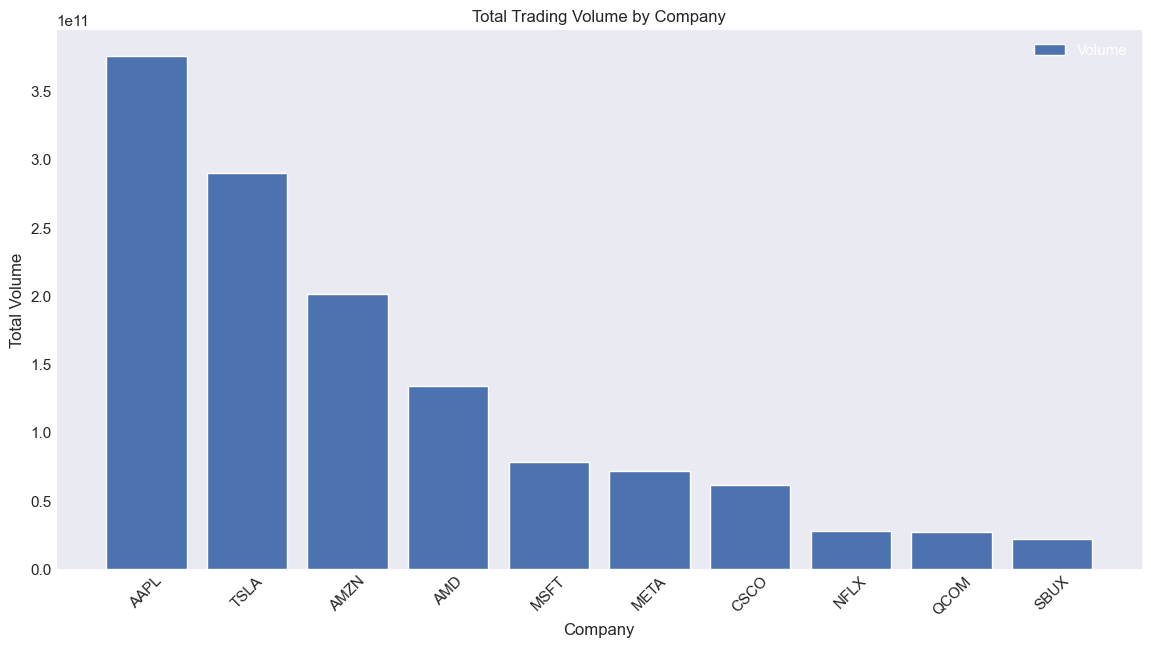

In [27]:
dp = df.groupby('Company')['Volume'].sum().reset_index()
dp = dp.sort_values(by='Volume', ascending=False)
plt.figure(figsize=(14, 7))
plt.bar(dp['Company'], dp['Volume'])
plt.title('Total Trading Volume by Company')
plt.xlabel('Company')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.style.use('dark_background')
plt.legend(['Volume'])
plt.show()

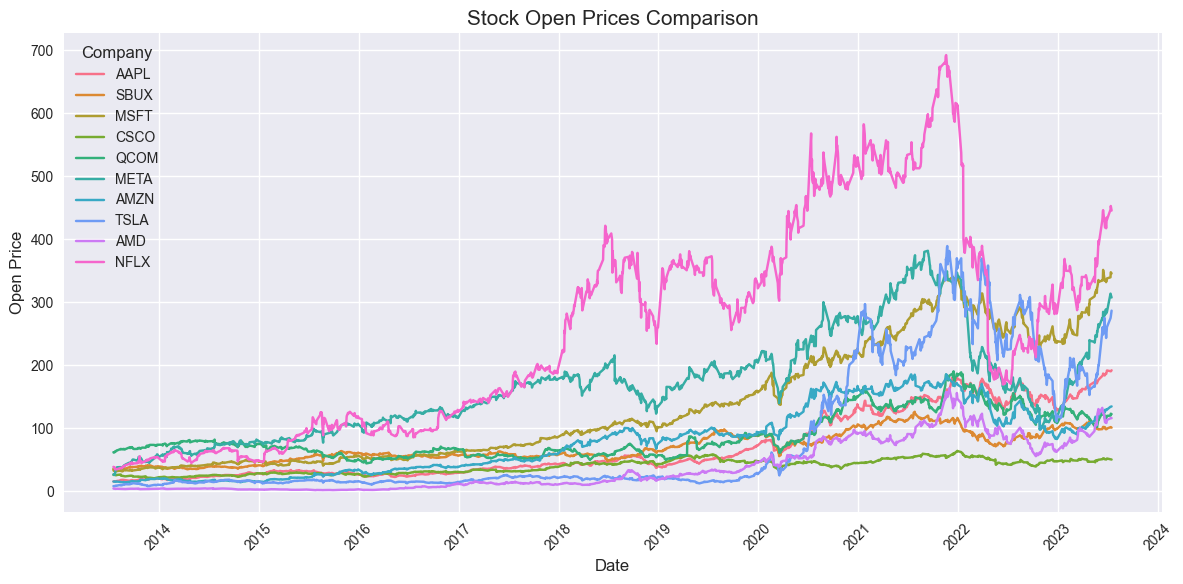

In [28]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df, 
    x='Date', 
    y='Open', 
    hue='Company',
    #marker='o'
)

plt.title('Stock Open Prices Comparison', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()